In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Start by locating the minima of a simple function, f(x,y) = (x-2)^2 + (y-2)^2

In [3]:


def easy_2D_grad_descent(f,x0,y0,tol=1e-3,h=1e-6,gamma=.1):
    """Gradient descent function for the easy to evaluate function given as the starting point of q3. 
    """
    
    #first, define the initial values given as x and y
    
    x = x0
    y = y0
    fs = []
    while True:
        fs.append(f(x,y))
        fprimex = (f(x=x + h,y=y ) - f(x=x,y=y )) / (h)
        fprimey = (f(x=x,y=y+h ) - f(x=x,y=y ) )/ (h)
   #     fprimez = f(x=x,y=y +h) - f(x=x,y=y ) / (h)

        xnew = x- gamma*fprimex
        ynew = y - gamma*fprimey
    #    znew = z - gamma*fprimez
        print('x',x)
        print('xnew',xnew)
        if abs(xnew-x) + abs(ynew - y)<tol: #+ abs(znew - z) < tol:
            break
        x = xnew
        y = ynew
    return x,y, fs

In [4]:
f = lambda x,y: (x-2)**2 + (y-2)**2
x,y,fs = easy_2D_grad_descent(f,20,-30)

x 20
xnew 16.39999989540229
x 16.39999989540229
xnew 13.519999804902909
x 13.519999804902909
xnew 11.215999739324616
x 11.215999739324616
xnew 9.372799689135718
x 9.372799689135718
xnew 7.898239652395205
x 7.898239652395205
xnew 6.718591623002794
x 6.718591623002794
xnew 5.774873198351997
x 5.774873198351997
xnew 5.019898458205034
x 5.019898458205034
xnew 4.4159186665137895
x 4.4159186665137895
xnew 3.932734833302902
x 3.932734833302902
xnew 3.546187766592084
x 3.546187766592084
xnew 3.236950113152375
x 3.236950113152375
xnew 2.9895599904538983
x 2.9895599904538983
xnew 2.7916478923661714
x 2.7916478923661714
xnew 2.633318213842699
x 2.633318213842699
xnew 2.5066544710594485
x 2.5066544710594485
xnew 2.4053234768417298
x 2.4053234768417298
xnew 2.3242586814653343
x 2.3242586814653343
xnew 2.259406845164218
x 2.259406845164218
xnew 2.2075253761211044
x 2.2075253761211044
xnew 2.1660202008910545
x 2.1660202008910545
xnew 2.1328160607078472
x 2.1328160607078472
xnew 2.106252748562114
x 2.

Text(0, 0.5, '$f(x,y)$')

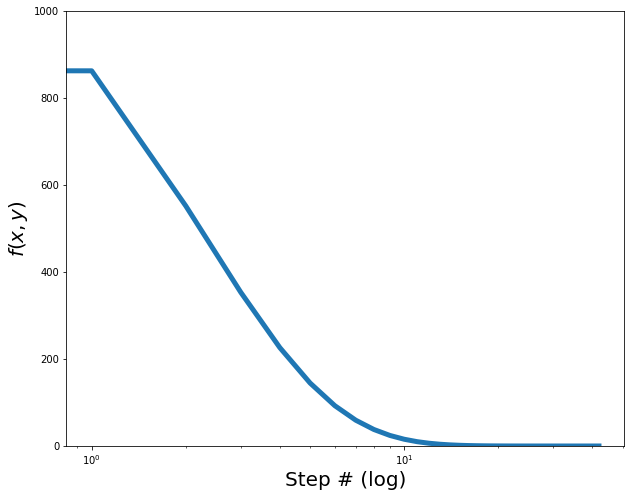

In [12]:
plt.figure(figsize=(10,8))
plt.plot(fs,linewidth=5)
plt.ylim([0,1000])
plt.xlabel("Step # (log)",fontsize=20)
plt.xscale('log')
plt.ylabel("$f(x,y)$",fontsize=20)

In [5]:
cosmos = pd.read_table("../dat/smf_cosmos.dat", sep="\s+",header=None)
cosmos.rename(columns={0:"log M_gal [dex]",1:"n(M_gal) [1/dex/Volume]",2:"error in n(M_gal)"},inplace=True)



In [7]:

def schecter(x,phi,M,alpha):
    return phi *(x/M)**(alpha+1) * np.exp(-x/M)* np.log(10)


def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],phi,M,alpha) #evaluate schecter with these conditions 
    cosmos['Chi Term'] = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) / (cosmos['n(M_gal) [1/dex/Volume]'])**2
    chisquared = sum(cosmos['Chi Term']) #this is the value to minimize
    return chisquared
    
    

def schechter_grad_descent(cosmos,phi0,M0,alpha0,h=1e-6,gamma=.1,tol=1e-5):
    """
    Apply gradient descent to  minimize the fitting tool (chi squared in thsi case)
    of the schecter function used to characterize the number of galaxies found in the unvierse at a given mass (scaled by some characteristic mass which we 
    will find now).
    
    
    """
    
    
    phi = phi0
    
    M = M0
    
    alpha = alpha0
    
    

    while True:
        print(phi,M,alpha)
        chiprime_phi = (chisquared(cosmos,phi+h,M,alpha) - chisquared(cosmos,phi-h,M,alpha)) / (2*h)
        chiprime_M = (chisquared(cosmos,phi,M+h,alpha) - chisquared(cosmos,phi,M-h,alpha)) / (2*h)
        chiprime_alpha = (chisquared(cosmos,phi,M,alpha+h) - chisquared(cosmos,phi,M,alpha-h)) / (2*h)
        print("Chi Squared: ", chisquared(cosmos,phi,M,alpha))
        
        phinew = phi - gamma * chiprime_phi
        Mnew = M - gamma * chiprime_M
        alphanew = alpha - gamma * chiprime_alpha
        if abs(alphanew - alpha) + abs(Mnew - M) + abs(phinew - phi) < tol:
            break
         
        phi = phinew
        M = Mnew
        alpha = alphanew
    return phi,M,alpha

In [9]:
cosmos['log M_gal [dex]'] = 10** cosmos['log M_gal [dex]']

In [10]:
cosmos

,log M_gal [dex],n(M_gal) [1/dex/Volume],error in n(M_gal)
0,3.981072e+09,0.006871,0.000734
1,6.309573e+09,0.005688,0.000655
2,1.000000e+10,0.005491,0.000582
3,1.584893e+10,0.004989,0.000568
4,2.511886e+10,0.004780,0.000548
5,3.981072e+10,0.004230,0.000565
6,6.309573e+10,0.003651,0.000494
7,1.000000e+11,0.002253,0.000371
8,1.584893e+11,0.001117,0.000208
9,2.511886e+11,0.000418,0.000095


In [11]:
def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],phi=phi,M=M,alpha=alpha) #evaluate schecter with these conditions 
    chi_terms = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) #/ (cosmos['n(M_gal) [1/dex/Volume]'])
    chisquared = sum(chi_terms) #this is the value to minimize
    return chisquared
    
    
def schecter(x,phi,M,alpha):
    return phi *(x/M)**(alpha+1) * np.exp(-x/M)* np.log(10)



In [45]:
grid = pd.DataFrame(columns=['Phi','M','Alpha'])
phis = 10**np.arange(-3.2,-1,.1)
alphas = np.arange(-6,-1,.1)
ms = 10**np.arange(9,13,.1)

In [46]:
phis

array([ 0.00063096,  0.00079433,  0.001     ,  0.00125893,  0.00158489,
        0.00199526,  0.00251189,  0.00316228,  0.00398107,  0.00501187,
        0.00630957,  0.00794328,  0.01      ,  0.01258925,  0.01584893,
        0.01995262,  0.02511886,  0.03162278,  0.03981072,  0.05011872,
        0.06309573,  0.07943282])

In [47]:
X,Y,Z = np.meshgrid(phis,alphas,ms)

In [48]:

grid['Phi'] = X.flatten()
grid['M'] = Z.flatten()
grid['Alpha'] = Y.flatten()

In [49]:

grid['Chi Squared'] = grid.apply(lambda z: chisquared(cosmos,phi=z['Phi'],M=z['M'],alpha=z['Alpha']),axis = 1)

In [50]:
phi = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['Phi'].values[0]
alpha = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['Alpha'].values[0]
M = grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]['M'].values[0]

In [51]:
grid.loc[grid['Chi Squared'] == grid['Chi Squared'].min()]

,Phi,M,Alpha,Chi Squared
43341,0.001995,1.258925e+11,-1.1,0.000467


In [52]:
cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],alpha=alpha,M=M,phi=phi)

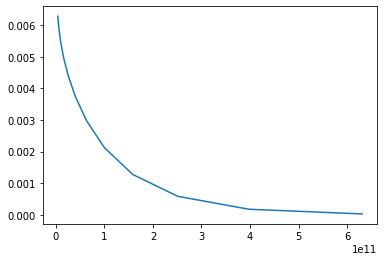

In [53]:
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])

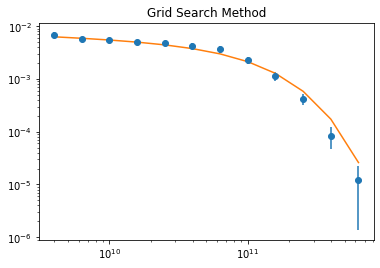

In [54]:
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['log M_gal [dex]'],y=(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],marker='o',ls='')
plt.title("Grid Search Method")
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])
plt.yscale('log')
plt.xscale('log')

REWRITE G DESCENT

LOG STEP SIZE, START WITH THOSE HUGE NUMBERS 

Gradient Descent here

In [ ]:
phis = np.arange(-1,2)
Ms = np.arange(10,11,.1)
alphas = np.arange(-10,-1,.1)
chimin = 1e5
for phi in phis:
    for M in Ms:
        for alpha in alphas:
            chisqua = chisquared(cosmos=cosmos,phi=phi,M=M,alpha=alpha)
            if chisqua < chimin:
                print("New Chi Min of ", chisqua)
                print("Params: ", phi,M,alpha)
                chimin = chisqua
                phimin = phi
                Mmin = M
                alphamin = alpha

In [39]:

def schecter(x,phi,M,alpha):
    return phi * (x/M)**(alpha+1) * np.exp(-x/M) * 2.30258509299


def chisquared(cosmos,phi,M,alpha):
   # print(cosmos)
    cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],phi=phi,M=M,alpha=alpha) #evaluate schecter with these conditions 
    chi_terms = ((cosmos['n(M_gal) [1/dex/Volume]'] - cosmos['Fitted Function'])**2) / (cosmos['n(M_gal) [1/dex/Volume]'])
    chisquared = sum(chi_terms) #this is the value to minimize
    return chisquared
    
    

def schechter_grad_descent(phi0,M0,alpha0,h=1,gamma=.01,tol=1e-5):
    """
    Apply gradient descent to  minimize the fitting tool (chi squared in thsi case)
    of the schecter function used to characterize the number of galaxies found in the unvierse at a given mass (scaled by some characteristic mass which we 
    will find now).
    
    
    
    This needs to be a log step, and start around 
  
  phi 0.000794
   
   M
    1.000000e+11
    
    alpha 
    -1.5
    
    
    """
    
    
    phi = phi0
    
    M = M0
    
    alpha = alpha0
    
    
    i = 0
    chiterms = []
    phis = []
    Ms = []
    alphas = []
    while True:
        cosmos = pd.read_table("../dat/smf_cosmos.dat", sep="\s+",header=None)
        cosmos.rename(columns={0:"log M_gal [dex]",1:"n(M_gal) [1/dex/Volume]",2:"error in n(M_gal)"},inplace=True)
        cosmos['log M_gal [dex]'] = 10** cosmos['log M_gal [dex]']
        chiprime_phi = (chisquared(cosmos,phi+h,M,alpha) - chisquared(cosmos,phi,M,alpha)) / (h)
        
     #   print("Chi squared: ")
     #   print(chisquared(cosmos,phi,M,alpha))
     #   print("Chisquared + h" )
     #   print(chisquared(cosmos,phi+h,M,alpha))
        phinew = phi - gamma * chiprime_phi

        chiprime_M = (chisquared(cosmos,phi,M+h,alpha) - chisquared(cosmos,phi,M,alpha)) / (h)
        Mnew = M - gamma * chiprime_M
        
        chiprime_alpha = (chisquared(cosmos,phi,M,alpha+h) - chisquared(cosmos,phi,M,alpha)) / (h)
        
        alphanew = alpha - gamma * chiprime_alpha
      #  print("starting vals: ")
      #  print(phi,M,alpha)
      #  print("Derivatives: ")
      #  print(chiprime_phi,chiprime_M,chiprime_alpha)
       # print("Grad descent vals: ")
      #  print(phinew,Mnew,alphanew)
        if abs(chisquared(cosmos,phi,M,alpha) - chisquared(cosmos,phinew,Mnew,alphanew)) < tol:
            print("Best vals: ", phi,M,alpha)
            break
        
        phi = phinew
        M = Mnew
        alpha = alphanew
        chiterms.append(chisquared(cosmos,phi,M,alpha))
        print(chisquared(cosmos,phi,M,alpha))
        phis.append(phi)
        Ms.append(M)
        alphas.append(alpha)
        i+=1
        
        
    return chiterms,phis,Ms,alphas,i

In [40]:
cosmos['log M_gal [dex]']

0     3.981072e+09
1     6.309573e+09
2     1.000000e+10
3     1.584893e+10
4     2.511886e+10
5     3.981072e+10
6     6.309573e+10
7     1.000000e+11
8     1.584893e+11
9     2.511886e+11
10    3.981072e+11
11    6.309573e+11
Name: log M_gal [dex], dtype: float64

In [41]:
chiterms,phis,Ms,alphas,i = schechter_grad_descent(8,10.5,1,gamma=.5,tol=1e-2)

Best vals:  8 10.5 1


In [ ]:
plt.plot(range(i),chiterms)

In [ ]:
plt.plot(range(i),phis)

In [ ]:
plt.plot(range(i),Ms)

In [ ]:
plt.plot(range(i),alphas)

In [ ]:
cosmos['Fitted Function'] = schecter(cosmos['log M_gal [dex]'],alpha=-11,M=5,phi=8)

In [ ]:
plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])

In [ ]:
#plt.plot(df['log M_gal [dex]'],df['n(M_gal) [1/dex/Volume]'],'bo')
plt.errorbar(x = cosmos['log M_gal [dex]'],y=np.log10(cosmos['n(M_gal) [1/dex/Volume]']),
             yerr=cosmos['error in n(M_gal)'],marker='o',ls='')

plt.plot(cosmos['log M_gal [dex]'],cosmos['Fitted Function'])


Now we try to fit the schecter function!